In [1]:
import sys
import os

# Manually set base path if __file__ is undefined
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(BASE_PATH)


In [4]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from data_processing.pipeline.dataset import SurgicalPhaseDataset, train_transforms

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "../../")))
from utils.phase_utils import get_phase_to_index

PHASE_TO_INDEX = get_phase_to_index()

# Define dataset and transformations
CSV_FILE = "../../data/splits/train_split.csv"
IMAGE_DIR = "/vol/scratch/SoC/misc/2024/sc22jg/frames/"  

NameError: name '__file__' is not defined

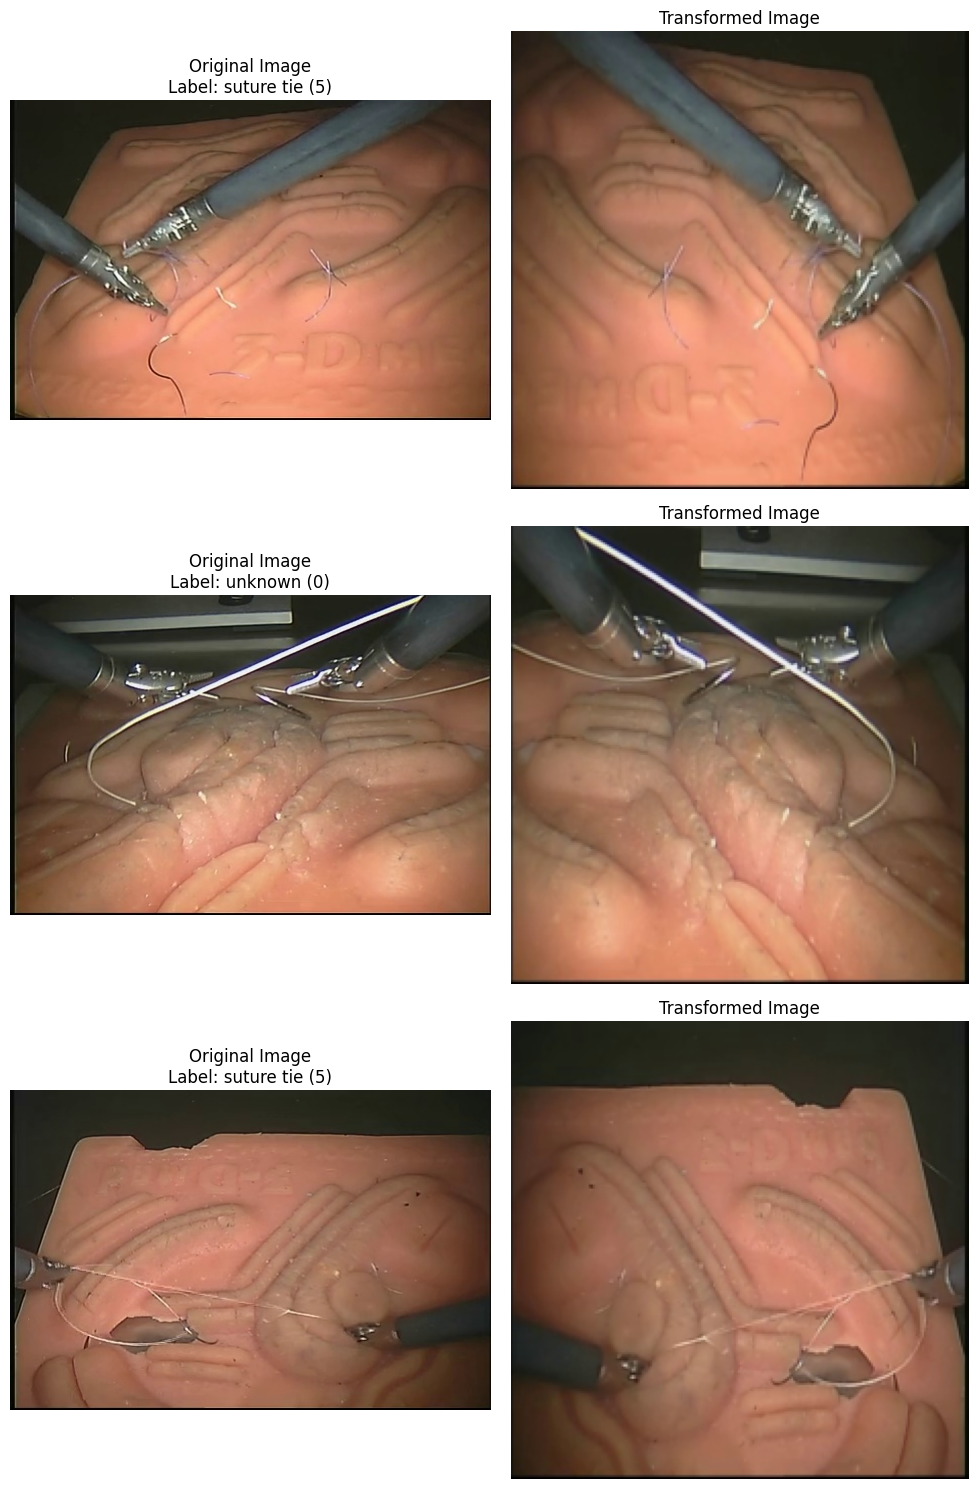

In [6]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.RandomHorizontalFlip(p=1.0),  # Always flip for visualization
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load dataset
dataset = SurgicalPhaseDataset(data_split=CSV_FILE, image_dir=IMAGE_DIR, transform=train_transforms)

# Select three random samples
sample_indices = torch.randint(0, len(dataset), (3,)).tolist()

# Set up the figure for visualization
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


for i, sample_idx in enumerate(sample_indices):
    # Get image path from dataset
    image_path = os.path.join(IMAGE_DIR, dataset.data.iloc[sample_idx]["file_path"])

    # Load original image before applying transforms
    original_image = Image.open(image_path).convert("RGB")

    # Apply transformations manually to the same image
    transformed_image = train_transforms(original_image)
    
    # Reverse normalization for visualization
    unnormalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    transformed_image_un = unnormalize(transformed_image).clip(0, 1)

    # Convert transformed tensor back to PIL image for visualization
    transformed_image_pil = transforms.ToPILImage()(transformed_image_un)

    # Get phase label
    label_int = dataset.data.iloc[sample_idx]["phase"]
    label_name = [key for key, value in PHASE_TO_INDEX.items() if value == label_int][0]  # Reverse lookup

    # Plot original and transformed images
    axes[i, 0].imshow(original_image)
    axes[i, 0].set_title(f"Original Image\nLabel: {label_name} ({label_int})")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(transformed_image_pil)
    axes[i, 1].set_title("Transformed Image")
    axes[i, 1].axis("off")
    
    
    
# Adjust layout and display the images

output_path = "../../reports/visuals/frames/frame_conversion.png"

plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()
